In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import new_lib as nl
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
import wrangle as w

In [2]:
zil = w.wrangle_zillow()
zil
# acquiring and prepping the data set 

,id,bedrooms,bathrooms,square_footage,tax_value,yearbuilt,tax,fips
index,,,,,,,,
0,20,4.0,2.0,3633.0,296425.0,2005,6941.39,6037.0
1,31,3.0,4.0,1620.0,847770.0,2011,10244.94,6037.0
2,33,3.0,2.0,2077.0,646760.0,1926,7924.68,6037.0
3,62,0.0,0.0,1200.0,5328.0,1972,91.60,6037.0
4,97,0.0,0.0,171.0,6920.0,1973,255.17,6037.0
...,...,...,...,...,...,...,...,...
2140230,2982265,4.0,4.0,4375.0,422400.0,2015,13877.56,6037.0
2140231,2982268,4.0,3.0,2262.0,960756.0,2015,13494.52,6059.0
2140232,2982270,4.0,4.5,3127.0,536061.0,2014,6244.16,6059.0


In [3]:
zil.describe()
# quick description of the data

,id,bedrooms,bathrooms,square_footage,tax_value,yearbuilt,tax,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,1.490823e+06,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,8.608367e+05,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,2.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,7.452520e+05,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,1.490470e+06,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,2.235778e+06,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.982282e+06,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


In [4]:
zil.info()
# checking and confirming all datatypes remaining are numeric in nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   bedrooms        float64
 2   bathrooms       float64
 3   square_footage  float64
 4   tax_value       float64
 5   yearbuilt       int64  
 6   tax             float64
 7   fips            float64
dtypes: float64(6), int64(2)
memory usage: 130.6 MB


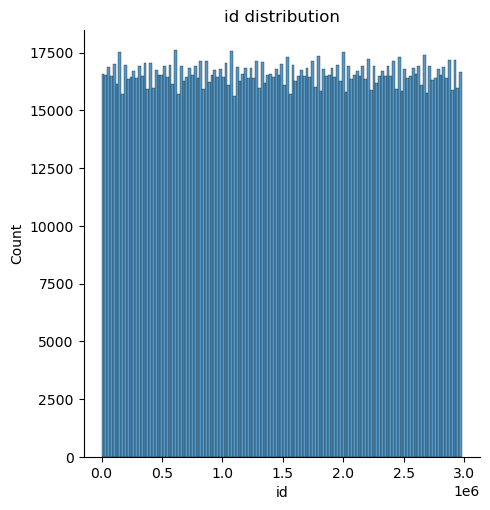

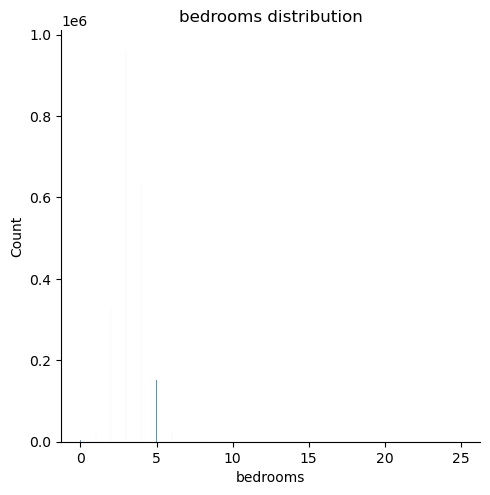

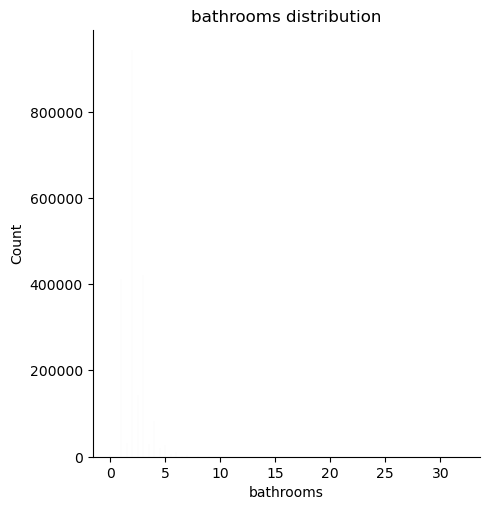

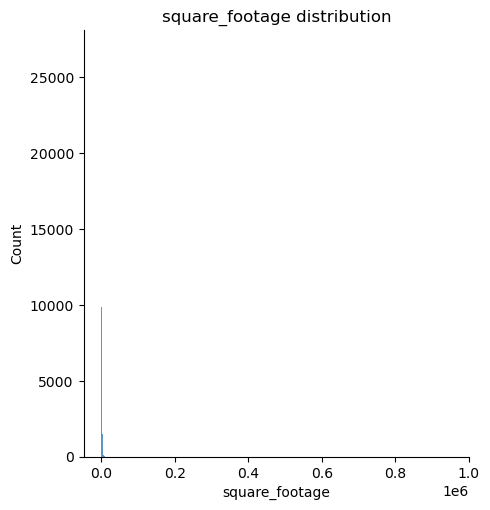

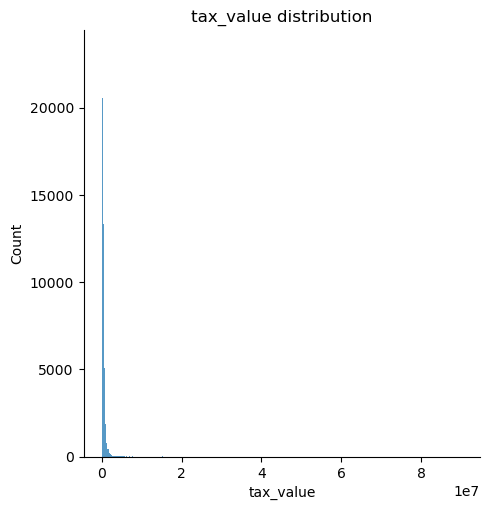

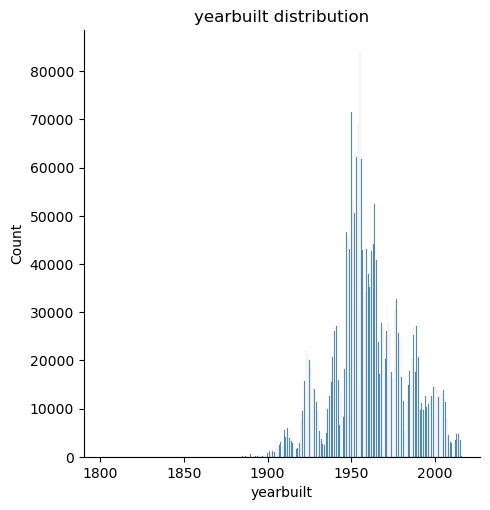

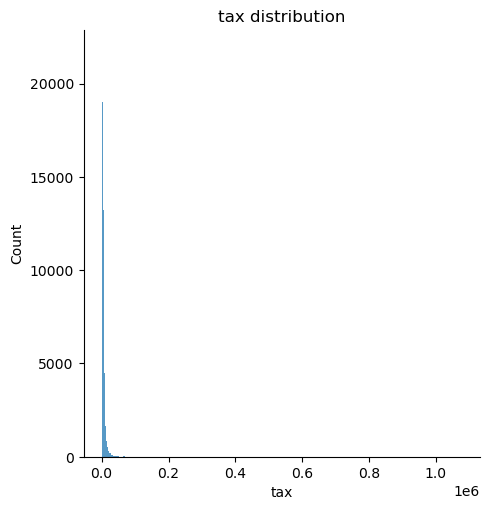

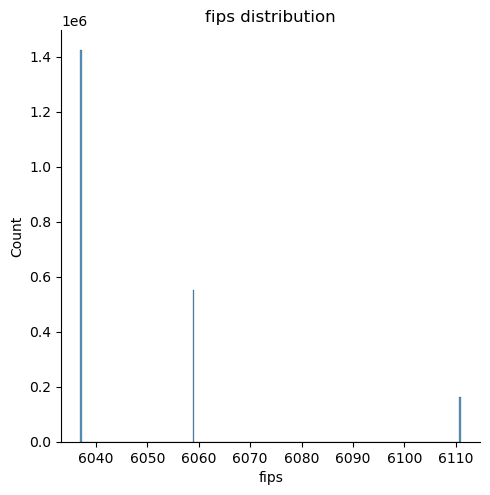

In [5]:
for col in zil.columns:
    
    sns.displot(zil[col])
    plt.title(f'{col} distribution')
    plt.show()
# Plotting all variables into distribution plot

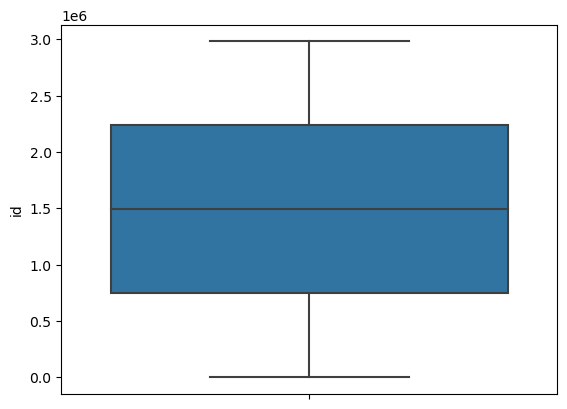

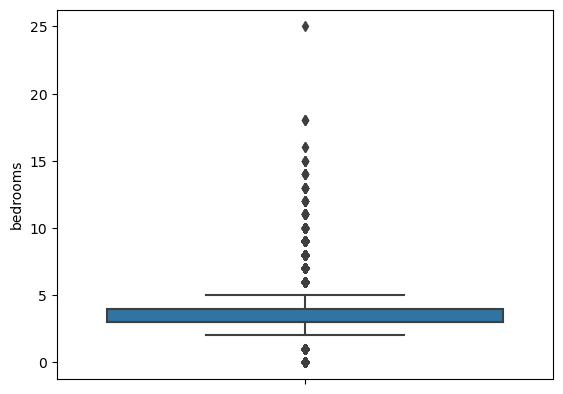

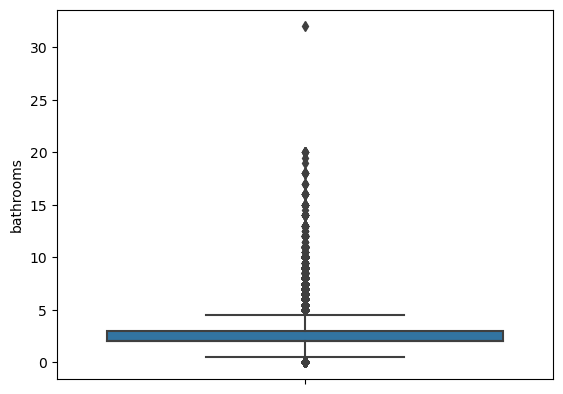

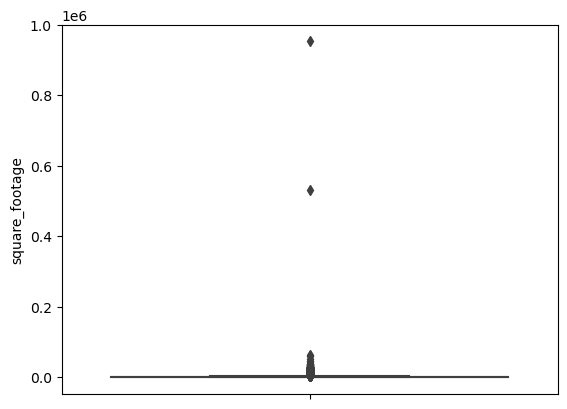

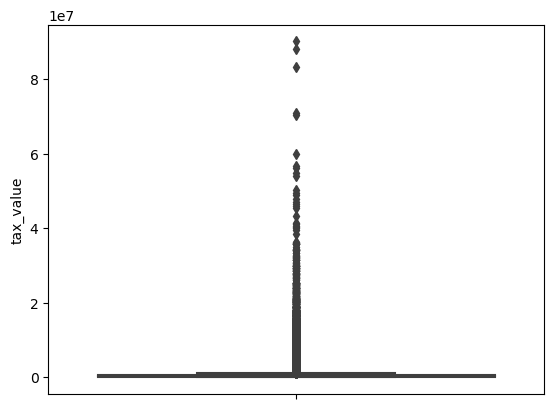

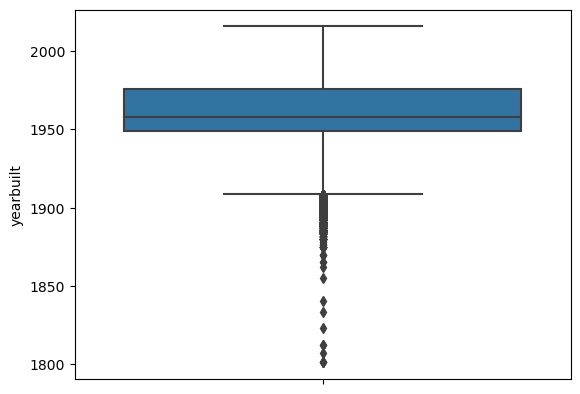

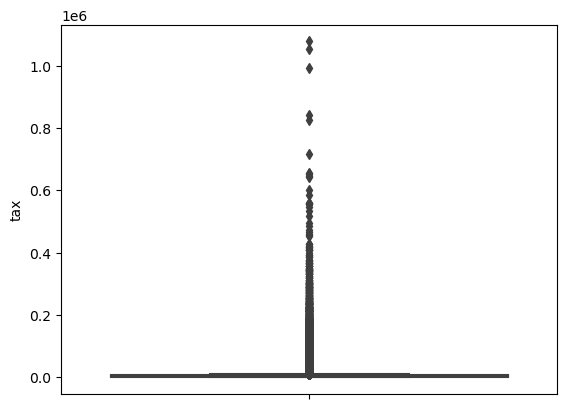

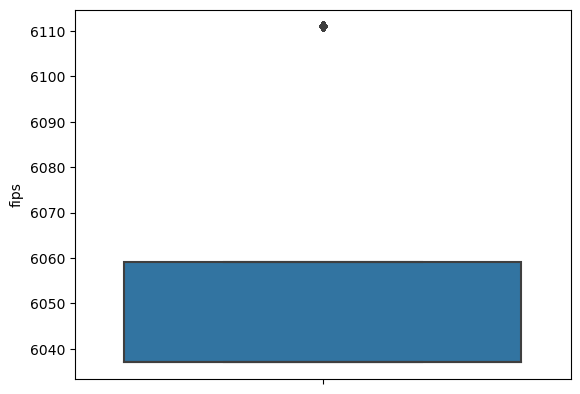

In [6]:
for col in zil.columns:
    sns.boxplot( y = zil[col].T)
    plt.show()